In [10]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

## Les fichiers bson

In [11]:
# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())
    
    
with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())
    
with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())
    

## Visualisation d'un elements de chaque table

In [12]:
i=0
print(f"L'element {i} de la table des avis:\n",avis[i])
print(f"\nL'element {i} de la table des jeux:\n",jeux[i])
print(f"\nL'element {i} de la infos_scrapping des avis:\n",infos[i])
print(f"\nL'element {i} de la details des avis:\n",details[i])

L'element 0 de la table des avis:
 {'_id': ObjectId('63c6726ea81f3e3016af9a56'), 'author': 'Monsieur Guillaume', 'date_published': '2021-01-27 11:06:44', 'title_review': 'Voyages sur les ailes des papillons', 'note': 8, 'review_href': 'https://www.trictrac.net/avis/vraiment-bon-12514', 'title': 'Mariposas', 'url': 'https://www.trictrac.net/jeu-de-societe/mariposas/avis?limit=10000', 'treated': True, 'comment': "Lorsque le jeu est jeu, bon, réflexif, joli pour qui est sensible à ce style d'illustration... Lorsque l'on a envie d'y rejouer encore pour essayer autrement, et revivre cette histoire de papillons et de voyages... Et lorsqu'en plus, au détour des règles, on s'intéresse également au propos et à la sensibilisation, légère comme les ailes du dit-papillons et pourtant aussi bien amené, alors effectivement, il y a là un très bon jeu, ludiquement parlant (et il est possible de s'arrêter là) mais également très bon pour l'ouverture des yeux des joueuses et joueurs au monde qui nous en

In [13]:
len_details=len(details)
len_jeux=len(jeux)
len_infos=len(infos)
len_avis=len(avis)
print(f"Longeur de chaque table de données avis: {len_avis}, jeux: {len_jeux}, infos: {len_infos}, details : {len_details}")

no_cat = 0
for d in details:
    if d["categories"]=="":
        no_cat+=1
        
print(f"Nombre de jeux sans categorie: {no_cat}, poucentage de jeux non catégorisé: {((no_cat/len(details))*100):.2f}%")


Longeur de chaque table de données avis: 246524, jeux: 20235, infos: 532, details : 20234
Nombre de jeux sans categorie: 3019, poucentage de jeux non catégorisé: 14.92%


## Crée des panda dataframes

In [14]:
pdDetails = pd.DataFrame(details)
pdJeux = pd.DataFrame(jeux)
pdInfos = pd.DataFrame(infos)
pdAvis = pd.DataFrame(avis)

print("Details:\n", pdDetails.describe())
print("\nAvis:\n", pdAvis.describe())
print("\nInfos:\n", pdInfos.describe())
print("\nJeux:\n", pdJeux.describe())

Details:
                Note  Note rectifiée   Note Finkel  Nombre d'avis  \
count  20234.000000    20234.000000  20234.000000   20234.000000   
mean       4.852528        4.591857      4.897049      15.583671   
std        3.666644        3.684093      4.157989      57.265863   
min        0.000000        0.000000     -0.050000       0.000000   
25%        0.000000        0.000000      0.000000       0.000000   
50%        6.270000        6.000000      6.010000       2.000000   
75%        8.000000        7.940000      8.090000       9.000000   
max       10.000000       10.000000     41.720000    1452.000000   

       Nombre d'avis rectifiés  
count             20234.000000  
mean                 11.663438  
std                  41.129909  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   7.000000  
max                 907.000000  

Avis:
                note
count  246524.00000
mean        7.59307
std         

In [15]:
pdDetails.tail()

,_id,categories,casting,gameplay,description,full_title,titre,url,Note,Note rectifiée,Note Finkel,Nombre d'avis,Nombre d'avis rectifiés
20229,63c7effdca188a9a85b03014,Jeux de guerre,Par Richard BergIllustré par Craig GrandoÉdité...,jusqu'à 2|14 à 99 |180,\n Golden Horde est une s...,Golden Horde (2006),Golden Horde,https://www.trictrac.net/jeu-de-societe/golden...,0.00,0.00,0.00,0.0,0.0
20230,63c7effeca188a9a85b0302c,Jeux de guerre,Par John PradosIllustré par Craig GrandoÉdité ...,jusqu'à 2|14 à 99 |180,\n Toppling the Reich est...,Toppling The Reich (2006),Toppling The Reich,https://www.trictrac.net/jeu-de-societe/toppli...,0.00,0.00,0.00,0.0,0.0
20231,63c7effeca188a9a85b03046,Jeux de guerre,Par Mark StilleIllustré par Craig GrandoÉdité ...,jusqu'à 2|14 à 99 |240,\n Imperial Sunset est le...,Imperial Sunset (2006),Imperial Sunset,https://www.trictrac.net/jeu-de-societe/imperi...,0.00,0.00,0.00,0.0,0.0
20232,63c7efffca188a9a85b0306b,Jeux de cartes,Par Reiner KniziaIllustré par Michael SchoberÉ...,2 à 6|4 ans et +|15,\n Que s'est-il passé dan...,La Grande Pagaille (2006),La Grande Pagaille,https://www.trictrac.net/jeu-de-societe/la-gra...,8.00,8.00,8.09,3.0,3.0
20233,63c7f052ca188a9a85b03354,"Gestion|Hasard (Dé, Cartes, ...)|Pirate",Par Gilles BecqIllustré par Kevin WandrolÉdité...,2 à 4|10 ans et +|30,\n Soyez le premier à réu...,Dice Seadog (2013),Dice Seadog,https://www.trictrac.net/jeu-de-societe/dice-s...,5.77,5.55,5.56,3.0,2.0


In [16]:
pdJeux.tail()

,_id,title,href,treated,avis
20230,63c68a2f22080b33e5b59ce6,Quelques Arpents de Neige,https://www.trictrac.net/jeu-de-societe/quelqu...,True,False
20231,63c68a2f22080b33e5b59ce7,Toppling The Reich,https://www.trictrac.net/jeu-de-societe/toppli...,True,False
20232,63c68a2f22080b33e5b59ce8,La Vallée de la Mort,https://www.trictrac.net/jeu-de-societe/la-val...,True,False
20233,63c68a2f22080b33e5b59ce9,La Grande Pagaille,https://www.trictrac.net/jeu-de-societe/la-gra...,True,False
20234,63c68a2f22080b33e5b59cea,Imperial Sunset,https://www.trictrac.net/jeu-de-societe/imperi...,True,False


In [17]:
pdInfos.head()

,_id,url,num_page,count
0,63c17a0030ad62ea332eaea0,https://www.trictrac.net/jeu-de-societe/?order...,1,32
1,63c17a0130ad62ea332eaef0,https://www.trictrac.net/jeu-de-societe/?order...,0,32
2,63c17a0130ad62ea332eaf01,https://www.trictrac.net/jeu-de-societe/?order...,7,31
3,63c17a0130ad62ea332eaf02,https://www.trictrac.net/jeu-de-societe/?order...,6,32
4,63c17a0130ad62ea332eaf23,https://www.trictrac.net/jeu-de-societe/?order...,4,32


In [18]:
pdAvis.head(20)

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment
0,63c6726ea81f3e3016af9a56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Lorsque le jeu est jeu, bon, réflexif, joli po..."
1,63c6726ea81f3e3016af9a57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7.0,https://www.trictrac.net/avis/le-festival-de-m...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Comment continuer après un mega hit ? Simpleme...
2,63c6726ea81f3e3016af9a58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7.0,https://www.trictrac.net/avis/vivez-la-migrati...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ..."
3,63c6726ea81f3e3016af9a59,Timi JeuxATheme,2020-11-19 17:04:57,Bon,8.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
4,63c6726ea81f3e3016af9a5a,prunelles,2021-05-24 12:43:18,Envolez-moi,9.0,https://www.trictrac.net/avis/envolez-moi,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Très joli bijou que ce jeu-là ! Le matériel, l..."
5,63c6726ea81f3e3016af9a5b,BSI40,2022-09-23 17:16:27,Manque un peu de souffle,7.0,https://www.trictrac.net/avis/manque-un-peu-de...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Mariposas est plutôt beau avec un grand platea...
6,63c6726ea81f3e3016af9a5c,kakawette,2020-09-10 23:16:35,"Papillon de lumière, sous les projecteurs",7.0,https://www.trictrac.net/avis/bon-13703,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Simple d'accès, mais tout de même un peu tacti..."
7,63c6726ea81f3e3016af9a5d,PawnPawn,2021-05-10 08:29:40,Pas mauvais,6.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
8,63c6726ea81f3e3016af9a5e,M.PinK,2021-08-29 10:37:54,Bon,7.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN
9,63c6726ea81f3e3016af9a5f,micmac85,2022-01-04 14:07:17,Bon,8.0,None,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,NaN


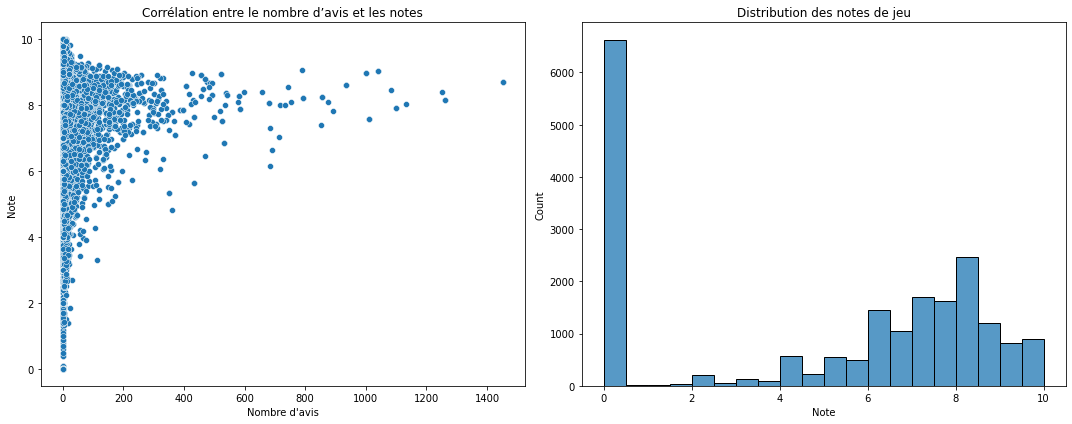

Coefficient de corrélation entre le nombre d’avis et les notes: 0.214


In [19]:

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pdDetails, x='Nombre d\'avis', y='Note')
plt.title('Corrélation entre le nombre d’avis et les notes')
plt.xlabel("Nombre d'avis")
plt.ylabel('Note')

plt.subplot(1, 2, 2)
sns.histplot(data=pdDetails, x='Note', bins=20)
plt.title('Distribution des notes de jeu')
plt.xlabel('Note')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

correlation = pdDetails['Nombre d\'avis'].corr(pdDetails['Note'])
print(f"Coefficient de corrélation entre le nombre d’avis et les notes: {correlation:.3f}")
# Il y a une tendence ou des jeux avec plus de commentaires pour avoir des notes plus élevées
# Cependant, la corrélation est faible, ce qui suggère que le nombre d’avis n’est pas un indicateur fiable de la note d’un jeu

In [20]:
# Method 1: Using pdDetails to check games with 0 reviews
games_no_reviews_1 = len(pdDetails[pdDetails["Nombre d'avis"] == 0.0])

# Method 2: Using pdJeux to check games with no reviews
games_no_reviews_2 = len(pdJeux[pdJeux["avis"] == False])

print(f"Nombre de jeux avec 0 avis (utilisant pdDetails): {games_no_reviews_1}")
print(f"Nombre de jeux sans avis (en utilisant pdJeux): {games_no_reviews_2}")

# Calculate percentage
total_games = len(pdDetails)
percentage_no_reviews = (games_no_reviews_1 / total_games) * 100

print(f"\nPourcentage de jeux sans avis : {percentage_no_reviews:.2f}%")


#Probleme de consistence entre les 2 datas (ASK LE MONSIEUR)


Nombre de jeux avec 0 avis (utilisant pdDetails): 6616
Nombre de jeux sans avis (en utilisant pdJeux): 18

Pourcentage de jeux sans avis : 32.70%


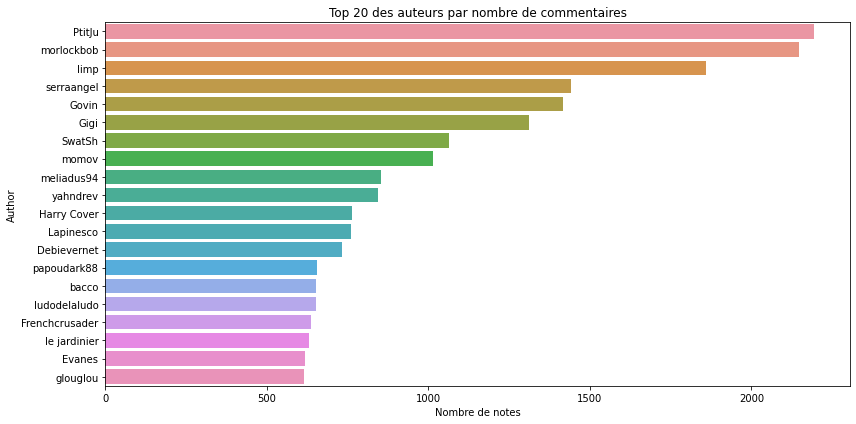

Nombre total d’auteurs uniques : 13623
Moyenne des avis par auteur : 18.10
Median des avis par auteur: 4.00

Top 5 most active reviewers:
PtitJu        2194
morlockbob    2146
limp          1858
serraangel    1442
Govin         1418
Name: author, dtype: int64


In [21]:
author_counts = pdAvis['author'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.head(20).values, y=author_counts.head(20).index)
plt.title('Top 20 des auteurs par nombre de commentaires')
plt.xlabel('Nombre de notes')
plt.ylabel('Author')

plt.tight_layout()
plt.show()

print(f"Nombre total d’auteurs uniques : {len(author_counts)}")
print(f"Moyenne des avis par auteur : {author_counts.mean():.2f}")
print(f"Median des avis par auteur: {author_counts.median():.2f}")
print("\nTop 5 most active reviewers:")
print(author_counts.head())

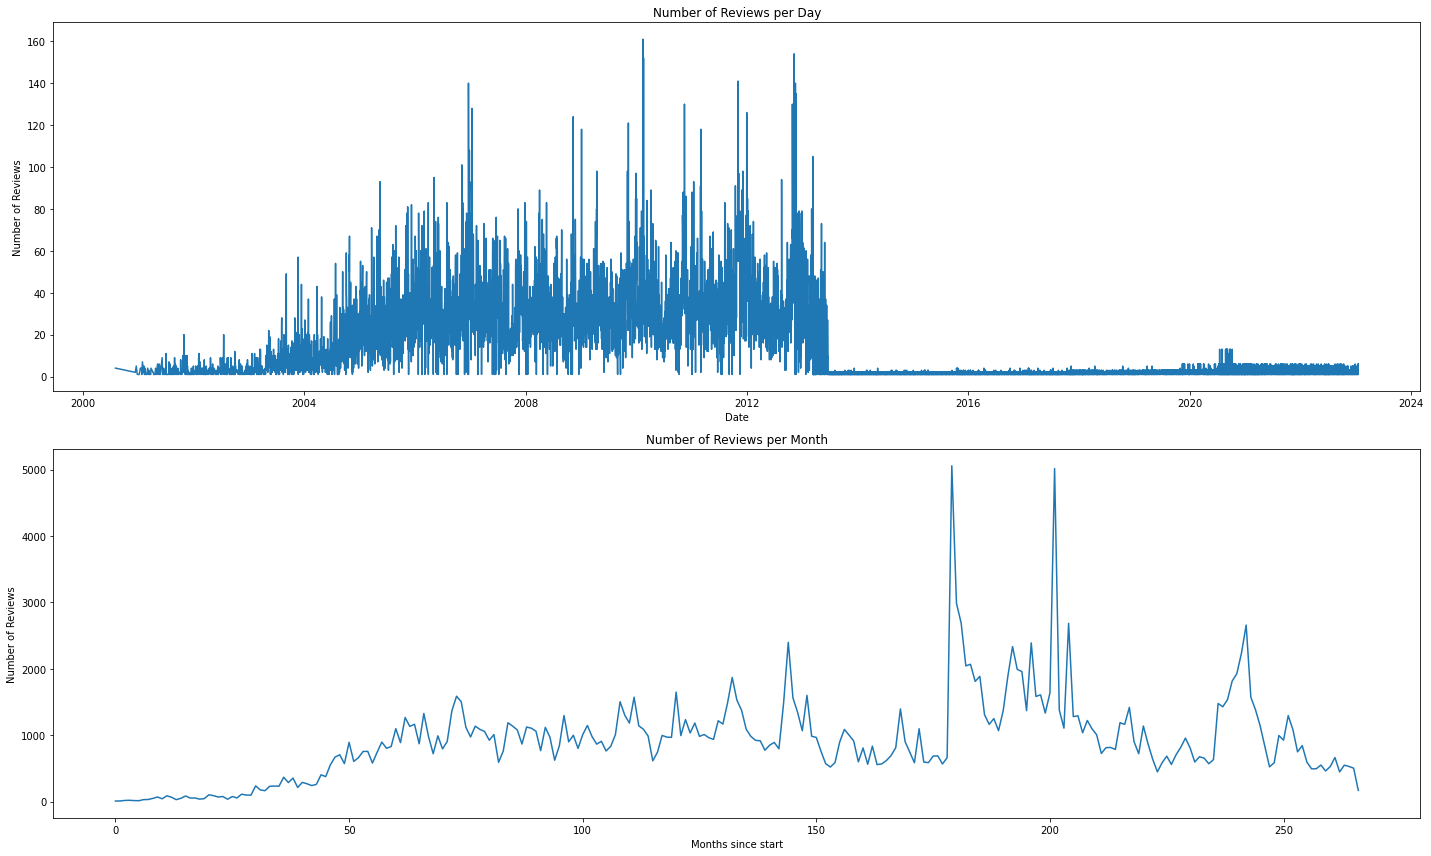

Total number of reviews: 246524
Average reviews per day: 3.16
Average reviews per month: 923.31
Most active day: 2010-02-14 with 161 reviews


In [22]:
# Convert date_published to datetime 
pdAvis['date_published'] = pd.to_datetime(pdAvis['date_published'])


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

# Daily review counts
daily_reviews = pdAvis['date_published'].value_counts().sort_index()
ax1.plot(daily_reviews.index, daily_reviews.values)
ax1.set_title('Number of Reviews per Day')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Reviews')

# Monthly review counts
monthly_reviews = pdAvis.groupby(pdAvis['date_published'].dt.to_period('M')).size()
ax2.plot(range(len(monthly_reviews)), monthly_reviews.values)
ax2.set_title('Number of Reviews per Month')
ax2.set_xlabel('Months since start')
ax2.set_ylabel('Number of Reviews')


plt.tight_layout()
plt.show()

# Print statistics
print(f"Total number of reviews: {len(pdAvis)}")
print(f"Average reviews per day: {daily_reviews.mean():.2f}")
print(f"Average reviews per month: {monthly_reviews.mean():.2f}")
print(f"Most active day: {daily_reviews.index[daily_reviews.argmax()].date()} with {daily_reviews.max()} reviews")

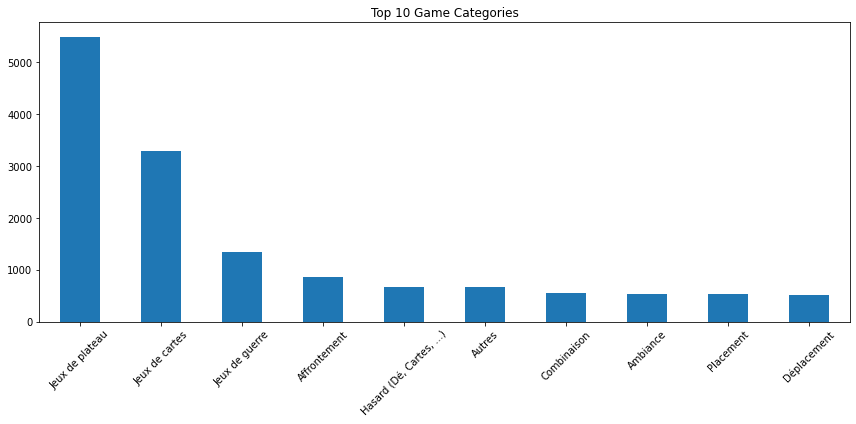

In [23]:
# Analyze game categories
def extract_categories(cat_str):
    if pd.isna(cat_str) or cat_str == "":
        return []
    return cat_str.split('|')

# Create category analysis
pdDetails['category_list'] = pdDetails['categories'].apply(extract_categories)
categories = [cat for cats in pdDetails['category_list'] for cat in cats]
cat_counts = pd.Series(categories).value_counts()

plt.figure(figsize=(12, 6))
cat_counts.head(10).plot(kind='bar')
plt.title('Top 10 Game Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
def extract_creators(casting):
    if pd.isna(casting):
        return []
    creators = re.findall(r'Par (.*?)(?:Illustré|Édité|$)', casting)
    return [c.strip() for c in creators]

pdDetails['creators'] = pdDetails['casting'].apply(extract_creators)
creators = [c for creators in pdDetails['creators'] for c in creators]
creator_counts = pd.Series(creators).value_counts()

print("Top 10 Game Creators:")
print(creator_counts.head(10))

Top 10 Game Creators:
Reiner Knizia        196
Steve Jackson         82
Michael Schacht       77
Klaus Teuber          68
Antoine Bauza         66
Martin Wallace        58
Friedemann Friese     56
Richard Borg          55
Uwe Rosenberg         52
Bruno Cathala         47
dtype: int64


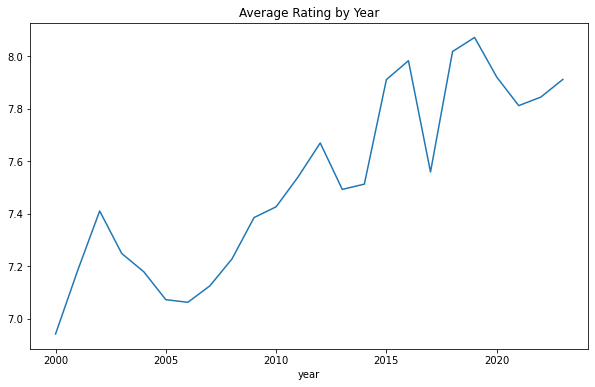

In [25]:
# Analyze rating trends over years
pdAvis['year'] = pdAvis['date_published'].dt.year
yearly_ratings = pdAvis.groupby('year')['note'].agg(['mean', 'count', 'std'])

plt.figure(figsize=(10, 6))
yearly_ratings['mean'].plot()
plt.title('Average Rating by Year')
plt.show()

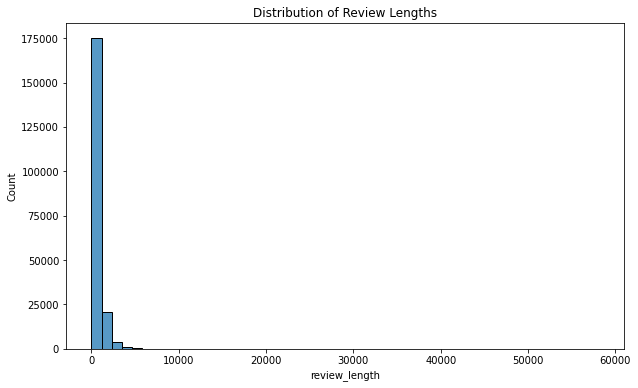

Average review length: 619 characters


In [26]:
pdAvis['review_length'] = pdAvis['comment'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

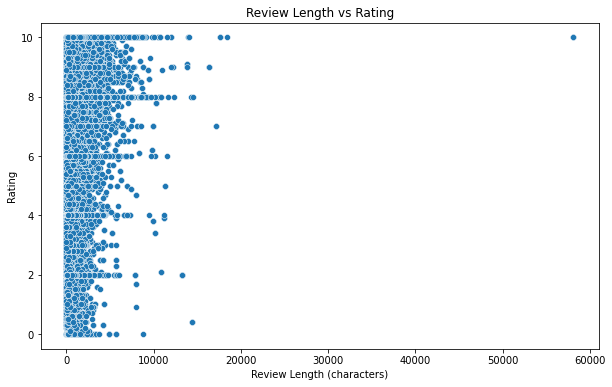

In [27]:
# Analyze if review length correlates with rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pdAvis, x='review_length', y='note')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()

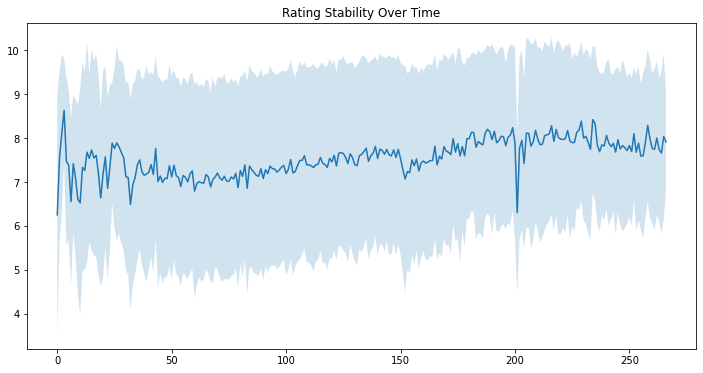

In [28]:
# Check if ratings are stable over time
pdAvis['month_year'] = pdAvis['date_published'].dt.to_period('M')
monthly_stats = pdAvis.groupby('month_year')['note'].agg(['mean', 'std'])

plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_stats)), monthly_stats['mean'])
plt.fill_between(range(len(monthly_stats)), 
                 monthly_stats['mean'] - monthly_stats['std'],
                 monthly_stats['mean'] + monthly_stats['std'],
                 alpha=0.2)
plt.title('Rating Stability Over Time')
plt.show()

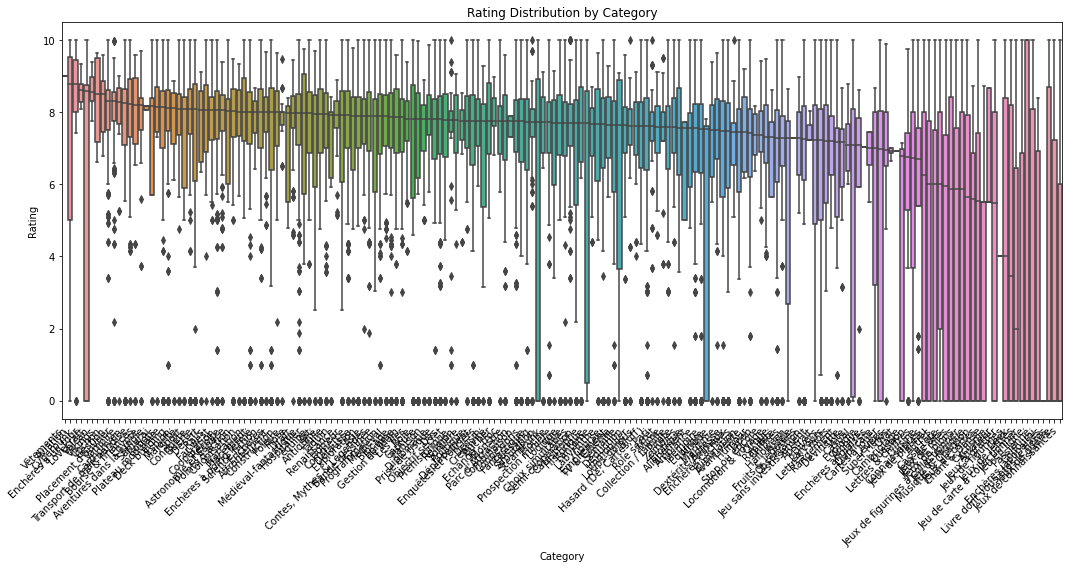


Category Statistics:
              count  mean  median   std
category                               
Abstrait        180  5.83    7.24  3.38
Affrontement    863  6.68    8.00  3.22
Afrique          30  6.93    7.50  2.17
Alignement       68  6.07    7.58  3.40
Amateur         218  4.24    5.50  4.01
...             ...   ...     ...   ...
Vote             23  6.32    7.10  2.60
Vêtements         2  9.00    9.00  0.00
Zombies         110  6.87    7.58  2.68
Équilibre        13  4.94    7.55  3.53
équipe          123  7.29    7.99  2.14

[184 rows x 4 columns]


In [29]:
# Expand categories into separate rows
category_ratings = []
for idx, row in pdDetails.iterrows():
    if isinstance(row['category_list'], list):
        for category in row['category_list']:
            category_ratings.append({
                'category': category,
                'rating': row['Note']
            })

# Create DataFrame and calculate category stats
cat_df = pd.DataFrame(category_ratings)
cat_stats = cat_df.groupby('category')['rating'].median().sort_values(ascending=False)

# Create box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cat_df, x='category', y='rating', order=cat_stats.index)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()

# Display plot
plt.show()

# Print category statistics
print("\nCategory Statistics:")
print(cat_df.groupby('category')['rating'].agg(['count', 'mean', 'median', 'std']).round(2))

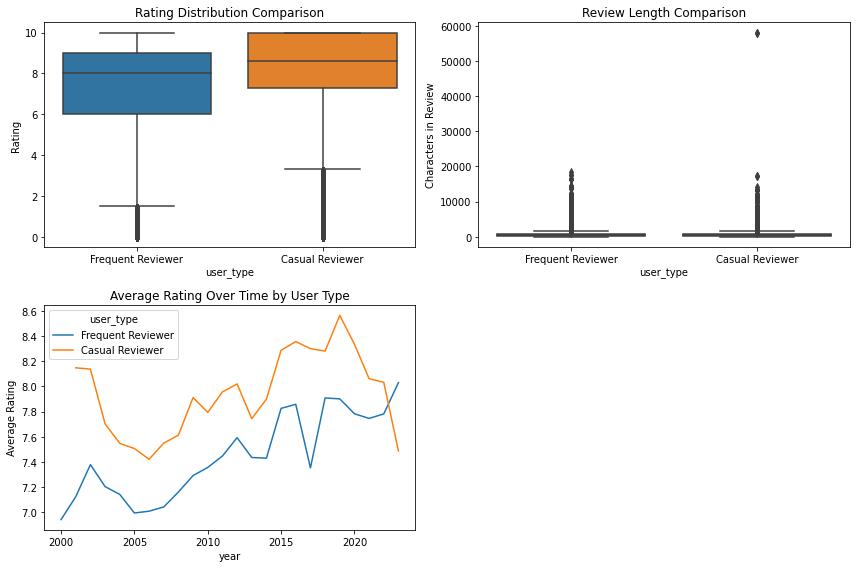

Rating Statistics Comparison:
       Casual Reviewers  Frequent Reviewers
count          47840.00           198684.00
mean               8.06                7.48
std                2.20                2.09
min                0.00                0.00
25%                7.30                6.00
50%                8.60                8.00
75%               10.00                9.00
max               10.00               10.00

Casual reviewers (<18 ratings): 11208 (82.3% of users)
Frequent reviewers (≥18 ratings): 2415 (17.7% of users)

Casual reviewers contribute 47840 ratings (19.4% of all ratings)
Frequent reviewers contribute 198684 ratings (80.6% of all ratings)


In [32]:
# Get count of ratings per user
user_rating_counts = pdAvis['author'].value_counts()

# Define casual vs frequent reviewers (below vs above average)
casual_users = user_rating_counts[user_rating_counts < 18].index
frequent_users = user_rating_counts[user_rating_counts >= 18].index

# Add a new column to identify user type
pdAvis['user_type'] = 'Casual Reviewer' 
pdAvis.loc[pdAvis['author'].isin(frequent_users), 'user_type'] = 'Frequent Reviewer'


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.boxplot(data=pdAvis, x='user_type', y='note')
plt.title('Rating Distribution Comparison')
plt.ylabel('Rating')

plt.subplot(2, 2, 2)
sns.boxplot(data=pdAvis, x='user_type', y='review_length')
plt.title('Review Length Comparison')
plt.ylabel('Characters in Review')

plt.subplot(2, 2, 3)
time_data = pdAvis.groupby(['year', 'user_type'])['note'].mean().reset_index()
sns.lineplot(data=time_data, x='year', y='note', hue='user_type')
plt.title('Average Rating Over Time by User Type')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

casual_stats = pdAvis[pdAvis['user_type'] == 'Casual Reviewer']['note'].describe()
frequent_stats = pdAvis[pdAvis['user_type'] == 'Frequent Reviewer']['note'].describe()

comparison = pd.concat([casual_stats, frequent_stats], axis=1)
comparison.columns = ['Casual Reviewers', 'Frequent Reviewers']
print("Rating Statistics Comparison:")
print(comparison.round(2))

casual_count = len(casual_users)
frequent_count = len(frequent_users) 
total_users = len(user_rating_counts)

print(f"\nCasual reviewers (<18 ratings): {casual_count} ({casual_count/total_users:.1%} of users)")
print(f"Frequent reviewers (≥18 ratings): {frequent_count} ({frequent_count/total_users:.1%} of users)")

# Calculate percentage of total ratings from each group
casual_ratings_count = pdAvis[pdAvis['user_type'] == 'Casual Reviewer'].shape[0]
frequent_ratings_count = pdAvis[pdAvis['user_type'] == 'Frequent Reviewer'].shape[0]
total_ratings = pdAvis.shape[0]

print(f"\nCasual reviewers contribute {casual_ratings_count} ratings ({casual_ratings_count/total_ratings:.1%} of all ratings)")
print(f"Frequent reviewers contribute {frequent_ratings_count} ratings ({frequent_ratings_count/total_ratings:.1%} of all ratings)")

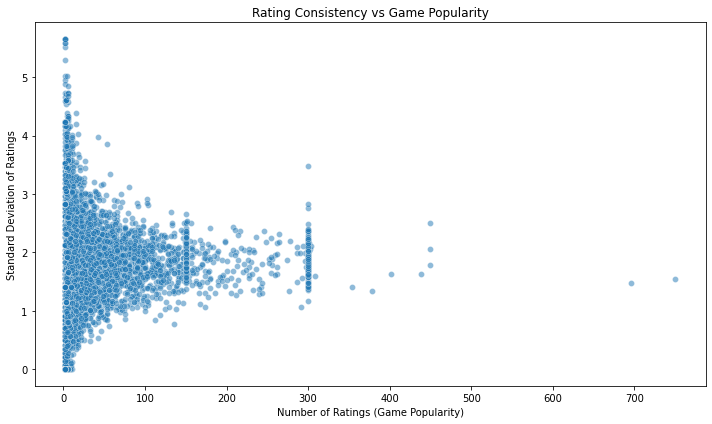

In [35]:

# Group games by number of ratings and calculate rating statistics
game_rating_counts = pdAvis.groupby('title')['note'].count().reset_index()
game_rating_counts.columns = ['title', 'rating_count']

game_stats = pdAvis.groupby('title')['note'].agg(['mean', 'std']).reset_index()
game_analysis = pd.merge(game_rating_counts, game_stats, on='title')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=game_analysis, x='rating_count', y='std', alpha=0.5)
plt.title('Rating Consistency vs Game Popularity')
plt.xlabel('Number of Ratings (Game Popularity)')
plt.ylabel('Standard Deviation of Ratings')
plt.tight_layout()
plt.show()

